# Purpose

This notebook is to test whether the `neuro_op` module's agents can successfully infer `world_dist` if only that distribution's information pieces are absorbed (i.e., with rates h>0, r=0).

For this, the model is run and agents informed with different numbers of information exchanged (i.e., different `t_max`, `h`). Then, each agent will produce its posterior predictive distribution by sampling

In [1]:
import neuro_op as nop
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy.stats as st

In [2]:
dist = st.norm(loc=[2,10,100])
dist.rvs(size=(2,3))

array([[  2.87415219,   9.42866131, 100.11794241],
       [  2.64235351,   9.80186528, 100.91614545]])

In [3]:
N_beliefs = 500

agents, G, beliefs, world, N_events, t_end = nop.run_model(
    N_agents=100,
    N_neighbours=3,
    N_beliefs=N_beliefs,
    belief_min=-50,
    belief_max=50,
    log_priors=np.zeros(N_beliefs),
    likelihood=st.norm(loc=0, scale=5),
    world_dist=st.norm(loc=0, scale=5),
    h=.2,
    r=1,
    t_max=10000,
)

print(f"Number of events: {N_events}")

Number of events: 12060


In [4]:
plt.rcParams.update({"font.size": 25})

Text(0, 0.5, '$p(\\mu|x_i)$')

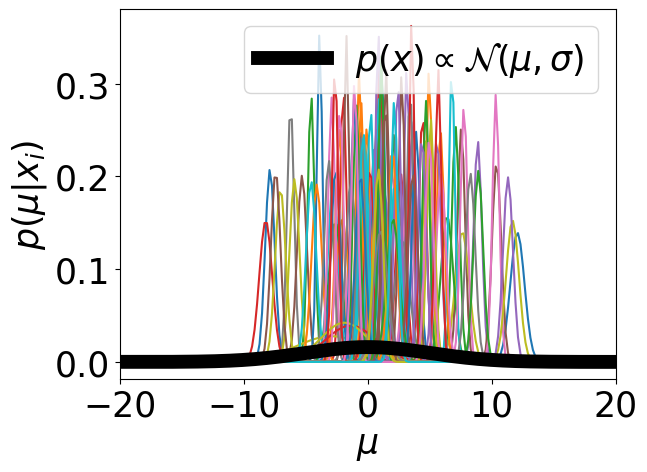

In [5]:
for i in range(len(agents)):
    plt.plot(agents[0].beliefs, nop.logpdf_to_pdf(agents[i].log_probs))
    plt.xlim([-20, 20])
plt.plot(
    beliefs,
    nop.logpdf_to_pdf(world.log_probs),
    color="black",
    linewidth=10,
    label="$p(x) \propto \mathcal{N}(\mu,\sigma)$",
)
plt.legend()
plt.xlabel("$\mu$")
plt.ylabel("$p(\mu|x_i)$")

(array([0.0004097 , 0.        , 0.00068283, 0.00054627, 0.00054627,
        0.0008194 , 0.00232163, 0.0028679 , 0.00518953, 0.00491639,
        0.00778429, 0.00887682, 0.01352008, 0.01911931, 0.0215775 ,
        0.03236625, 0.03141029, 0.04493037, 0.0464326 , 0.05216839,
        0.05995268, 0.07210709, 0.07224366, 0.07675035, 0.07456529,
        0.08180331, 0.08303241, 0.07593096, 0.06787353, 0.06541534,
        0.05831388, 0.05326092, 0.04588633, 0.04124307, 0.03318565,
        0.02635733, 0.02062154, 0.01707081, 0.01283725, 0.00914995,
        0.00710146, 0.00409699, 0.0032776 , 0.00273133, 0.00177536,
        0.00068283, 0.0008194 , 0.00068283, 0.00027313, 0.00013657]),
 array([-6.47085798, -5.7386138 , -5.00636962, -4.27412544, -3.54188126,
        -2.80963708, -2.07739291, -1.34514873, -0.61290455,  0.11933963,
         0.85158381,  1.58382799,  2.31607217,  3.04831635,  3.78056053,
         4.5128047 ,  5.24504888,  5.97729306,  6.70953724,  7.44178142,
         8.1740256 ,  8.90

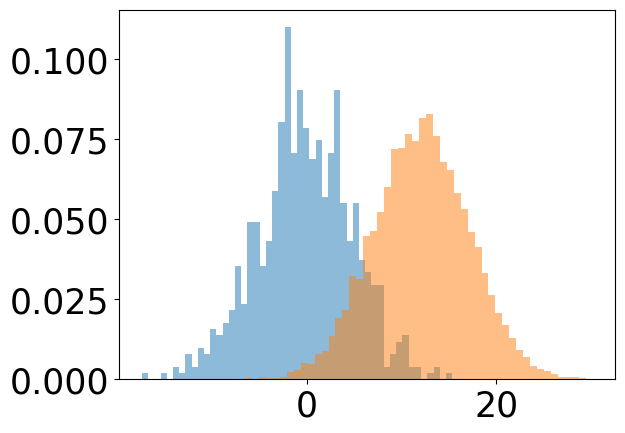

In [6]:
ppd = nop.ppd_Gaussian_mu(agents[0].beliefs, agents[0].log_probs, 10000)

plt.hist(world.diary_out, bins=50, density=True, alpha=0.5, label="world")
plt.hist(ppd, bins=50, density=True, alpha=0.5, label="agent")

In [10]:
Q,_ = np.histogram(world.diary_out, bins=50, range=(-20,20), density=True)
P,_ = np.histogram(
    logpdf_to_pdf(agents[0].log_probs), bins=50, range=(-20,20), density=True
    )

nop.kl_divergence(Q, P)

NameError: name 'logpdf_to_pdf' is not defined

In [ ]:
len(agents[0].diary_out)

385